#Data Pre-Processing

##Importing Titanic Dataset

*   Survived: 0 = No, 1 = Yes
*   Pclass: Ticket class	1 = 1st, 2 2nd, 3 = 3rd
*   Sex:	Sex
* Age	Age in years
* Sibsp:	# of siblings / spouses aboard the Titanic
* Parch:	# of parents / children aboard the Titanic
* Ticket:	Ticket number
* Fare: Passenger fare
* Cabin: Cabin number
* Embarked: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton







In [ ]:
import seaborn as sns
import pandas as pd
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##Performing Mean Imputation on Age Feature

In [ ]:
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']]).flatten()

NameError: name 'SimpleImputer' is not defined

##Performing feature encoding to convert categorical data in alpabetical format to numerical format based on its nature i.e binary, nominal, or ordinal and dropping features based on reasoning provided

###Dropping features

####Name

Name is being dropped because it cannot be converted to numerical values

In [ ]:
df = df.drop(columns=['Name'])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C148,C


####Cabin

Reason 1: Cabin has 687 rows with NaN value

In [ ]:
nan_count = df['Cabin'].isnull().sum()
nan_count

687

Reason 2: Cabin has high number of unique values and a low frequency of each value

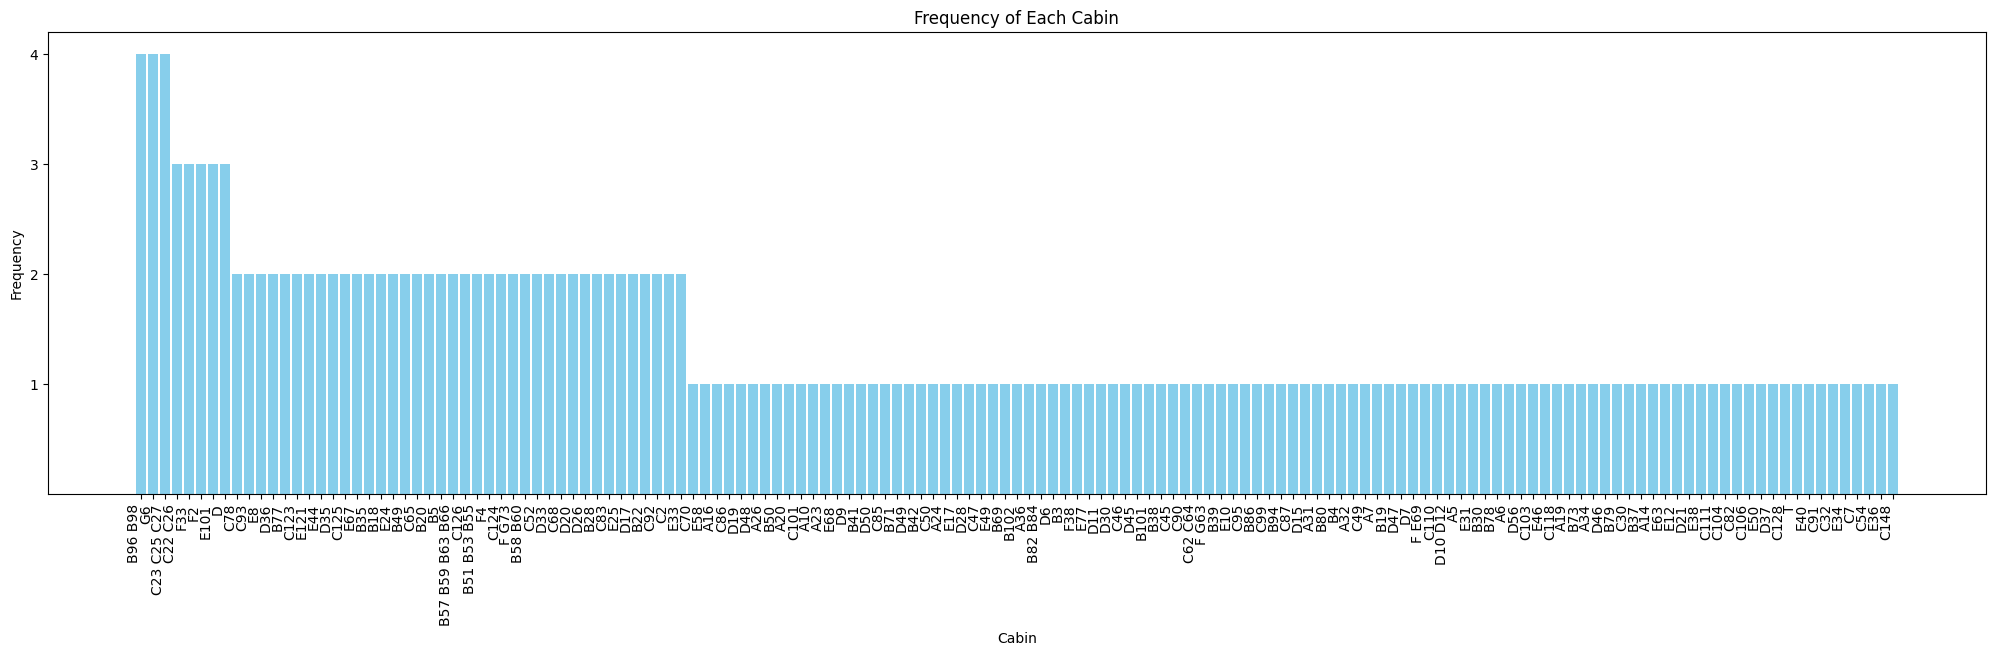

In [ ]:
cabin_counts = df['Cabin'].value_counts()
plt.figure(figsize=(25, 6))  # Adjust the figure size as needed

# Bar chart
bars = plt.bar(cabin_counts.index, cabin_counts.values, color='skyblue')

# Set y-axis limit to show only 1, 2, 3, and 4
plt.yticks([1, 2, 3, 4])

# Adding labels and title
plt.xlabel('Cabin')
plt.ylabel('Frequency')
plt.title('Frequency of Each Cabin')

# Rotate x-axis labels if there are many values
plt.xticks(rotation=90, ha='right')

# Display plot  # Adjust layout for better fit
plt.show()

For the above mentioned reasons we will drop the Cabin feature

In [ ]:
df = df.drop(columns=['Cabin'])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C


####Ticket

Ticket is being dropped because it cannot be converted to numerical values

In [ ]:
df = df.drop(columns=['Ticket'])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


###Encoding features

####Embarked

Most frequent Imputation for the NaN values

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the data
df['Embarked'] = imputer.fit_transform(df[['Embarked']]).flatten()
df['Embarked']
df.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

One Hot Encoding Embarked feature since the values are not relative to each other for example S is not closer to C than it is to Q.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform 'Embarked' column
enc = encoder.fit_transform(df[['Embarked']])

# Create DataFrame with encoded data
df_encoded = pd.DataFrame(enc, columns=encoder.categories_[0])

# Display the encoded DataFrame
df_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [ ]:
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(columns=['Embarked'])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,male,22.000000,1,0,7.2500,0.0,0.0,1.0
1,2,1,1,female,38.000000,1,0,71.2833,1.0,0.0,0.0
2,3,1,3,female,26.000000,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,female,35.000000,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,male,35.000000,0,0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,0.0,0.0,1.0
887,888,1,1,female,19.000000,0,0,30.0000,0.0,0.0,1.0
888,889,0,3,female,29.699118,1,2,23.4500,0.0,0.0,1.0
889,890,1,1,male,26.000000,0,0,30.0000,1.0,0.0,0.0


####Sex

Label encoding since the values are binary and independent in nature

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])

df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,1,22.000000,1,0,7.2500,0.0,0.0,1.0
1,2,1,1,0,38.000000,1,0,71.2833,1.0,0.0,0.0
2,3,1,3,0,26.000000,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,0,35.000000,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,1,35.000000,0,0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,0.0,0.0,1.0
887,888,1,1,0,19.000000,0,0,30.0000,0.0,0.0,1.0
888,889,0,3,0,29.699118,1,2,23.4500,0.0,0.0,1.0
889,890,1,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0


##Generating correlation heatmap to determine nature and intensity of relativity of each column to our target variable/column and dropping unrelated features


Heatmap shows features impacting Survived Feature are:
*   Pclass
*   Sex
*   Age
*   Fare
*   C


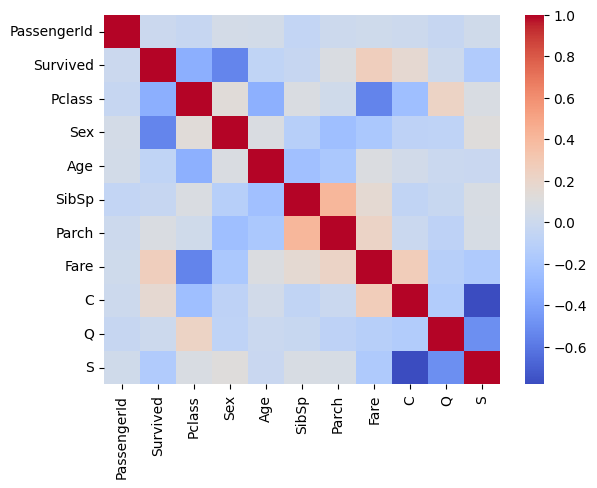

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

In [ ]:
df = df.drop(columns=['PassengerId', 'Parch', 'SibSp'])
df

,Survived,Pclass,Sex,Age,Fare,C,Q,S
0,0,3,1,22.000000,7.2500,0.0,0.0,1.0
1,1,1,0,38.000000,71.2833,1.0,0.0,0.0
2,1,3,0,26.000000,7.9250,0.0,0.0,1.0
3,1,1,0,35.000000,53.1000,0.0,0.0,1.0
4,0,3,1,35.000000,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,13.0000,0.0,0.0,1.0
887,1,1,0,19.000000,30.0000,0.0,0.0,1.0
888,0,3,0,29.699118,23.4500,0.0,0.0,1.0
889,1,1,1,26.000000,30.0000,1.0,0.0,0.0


##Viewing the dataset's properties and then standardizing or normalizing based on the readings we recieve from the .describe() function

While it is not wise to just drop a column whenever one wants to scale (standardize or normalize), but we want to practice feature scaling we will be dropping the Sex, C, Q, and S columns since they are already in binary format and changing values in these features to fit a scale will mean their nature will be distorted. (Discuss and confirm reasoning from Sir Rawaha)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   C         891 non-null    float64
 6   Q         891 non-null    float64
 7   S         891 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 55.8 KB


In [ ]:
df.describe()

,Survived,Pclass,Sex,Age,Fare,C,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,32.204208,0.188552,0.086420,0.725028
std,0.486592,0.836071,0.477990,13.002015,49.693429,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000


In [ ]:
df = df.drop(columns=['C', 'Q', 'S'])
df.describe()

,Survived,Pclass,Sex,Age,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,32.204208
std,0.486592,0.836071,0.477990,13.002015,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400
50%,0.000000,3.000000,1.000000,29.699118,14.454200
75%,1.000000,3.000000,1.000000,35.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200
